PREPROCESSING DATA

In [101]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from pandas import DataFrame
from collections import Counter
%matplotlib inline

In [69]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [70]:
# print the 5 records of the traiing dataset
training_data.head(10)

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [71]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


MISSING VALUE

In [72]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

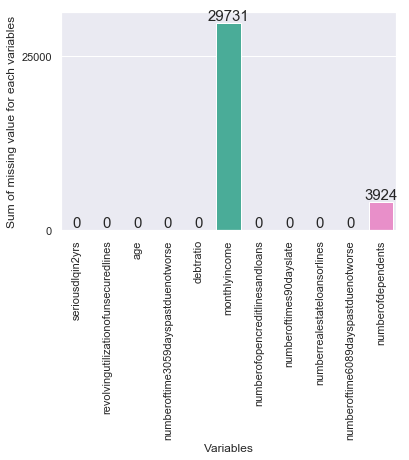

In [73]:
# Graphical representation of the missing values.
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=15, ha='center', va='bottom')
sns.set(font_scale=10)
ax.set_xlabel("Variables")
ax.set_ylabel("Sum of missing value for each variables")
plt.xticks(rotation=90)
plt.show()

In [74]:
# Actual replacement of the missing value using mean value.
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [75]:
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [136]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

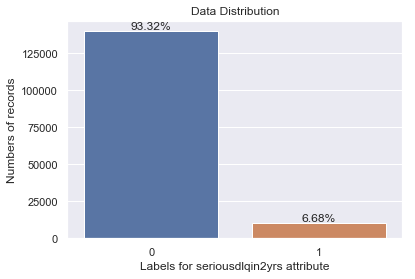

In [137]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

CORRELATION EACH VARIABLES

In [76]:
training_data.fillna((training_data.median()), inplace=True)
# Get the correlation of the training dataset
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


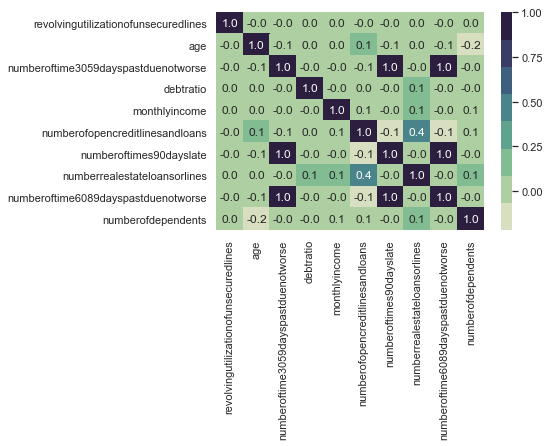

In [77]:
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

OUTLIER DETECTION

In [78]:
#
data = training_data.apply(lambda x: x.fillna(np.nanmedian(x),axis=0))
# Drop rows with missing column data
#data = data.dropna()

###
### Convert Data Into List Of Dict Records
###
data = training_data.to_dict(orient='records')

###
### Seperate Target and Outcome Features
###

vec = DictVectorizer()

df_data = vec.fit_transform(data).toarray()
feature_names = vec.get_feature_names()
df_data = DataFrame(
    df_data,
    columns=feature_names)

RevolvingUtilizationOfUnsecuredLines Variance

Median: 0.1541807 
Mean: 6.0484381
Values less than 2 : 149629 in 150000. Ratio: 99.75267%


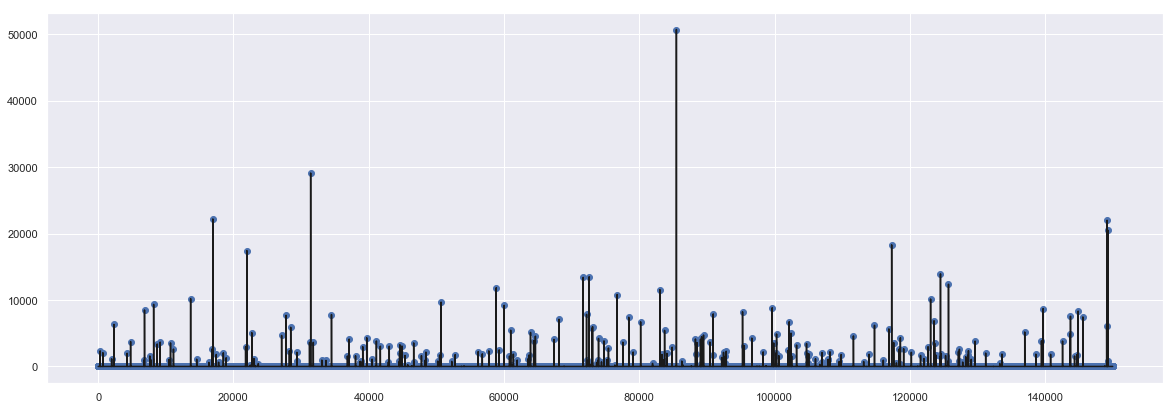

In [79]:
#plt.plot(data2.RevolvingUtilizationOfUnsecuredLines)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.revolvingutilizationofunsecuredlines, 'bo',df_data.revolvingutilizationofunsecuredlines, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.revolvingutilizationofunsecuredlines),np.mean(df_data.revolvingutilizationofunsecuredlines)))
ruoelLt2=len(df_data[df_data.revolvingutilizationofunsecuredlines < 2])
ruoelACt=len(df_data.revolvingutilizationofunsecuredlines)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(data2.RevolvingUtilizationOfUnsecuredLines, shade=True, color="r")
#data2.age.plot.box()
#data2.RevolvingUtilizationOfUnsecuredLines.plot.box()

In [80]:
ind = np.where(df_data.revolvingutilizationofunsecuredlines>2)
df_data.revolvingutilizationofunsecuredlines[ind[0]] = 2.

AGE 

Median: 52.0000000 
Mean: 52.2952067
Values less than 2 : 1 in 150000. Ratio: 0.00067%


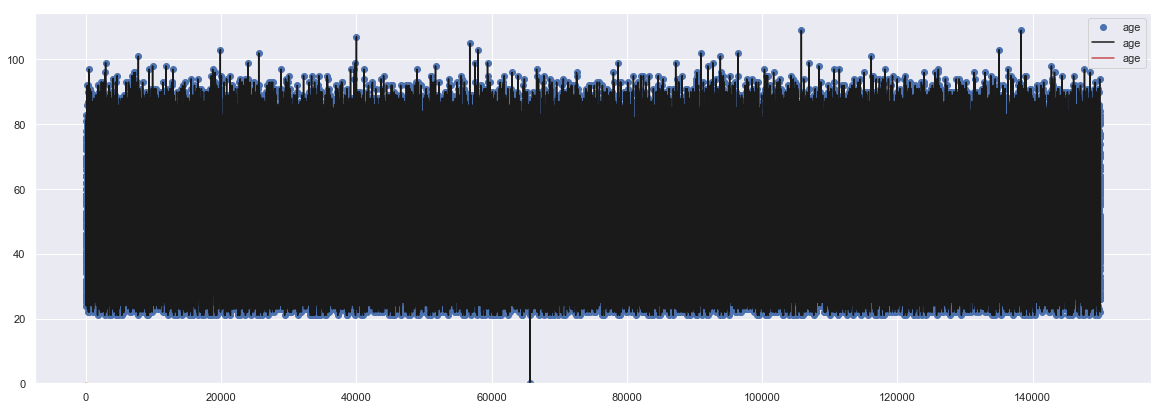

In [81]:
#plt.plot(df_data.age)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.age, 'bo',df_data.age, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.age),np.mean(df_data.age)))
ruoelLt2=len(df_data[df_data.age < 2])
ruoelACt=len(df_data.age)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
sns.kdeplot(df_data.age, shade=True, color="r")
#df_data.age.plot.box()
#df_data.age.plot.box()

In [82]:
ind = np.where(df_data.age<21)
df_data.age[ind[0]] = 21.
ind = np.where(df_data.age>94)
df_data.age[ind[0]] = 94. 

DEBT RATIO

Median: 0.3665078 
Mean: 353.0050758
Values less than 2 : 118785 in 150000. Ratio: 79.19000%


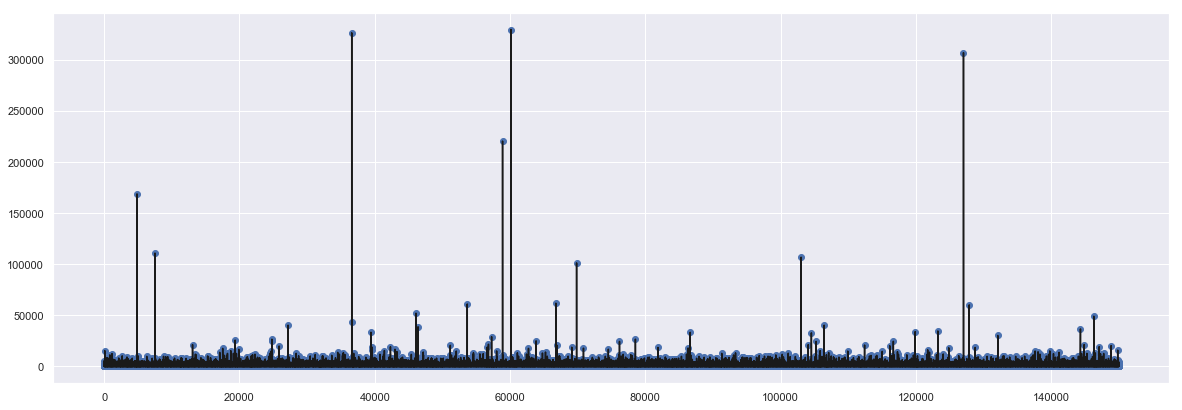

In [83]:
#plt.plot(data2.debtratio)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.debtratio, 'bo',df_data.debtratio, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.debtratio),np.mean(df_data.debtratio)))
ruoelLt2=len(df_data[df_data.debtratio < 2])
ruoelACt=len(df_data.debtratio)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(df_data.debtratio, shade=True, color="r")
#df_data.age.plot.box()
#df_data2.debtratio.plot.box()

In [84]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [85]:
minUpperBound = min([val for (val, out) in zip(df_data.debtratio, mad_based_outlier(df_data.debtratio)) if out == True])
### Set outlier values to upperbound, that is minUpperBound.
ind = np.where(df_data.debtratio>minUpperBound)
df_data.debtratio[ind[0]] = minUpperBound

MONTHLY INCOME

Median: 5400.0000000 
Mean: 6418.4549200
Values less than 2 : 2239 in 150000. Ratio: 1.49267%


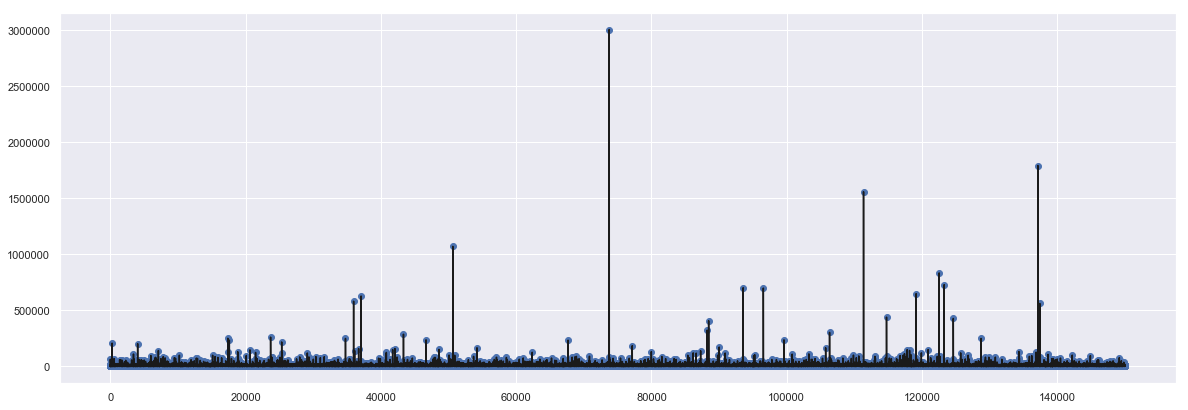

In [86]:
#plt.plot(data2.monthlyincome)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.monthlyincome, 'bo',df_data.monthlyincome, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.monthlyincome),np.mean(df_data.monthlyincome)))
ruoelLt2=len(df_data[df_data.monthlyincome < 2])
ruoelACt=len(df_data.monthlyincome)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(data2.monthlyincome, shade=True, color="r")
#df_data.age.plot.box()
#df_data.monthlyincome()

In [87]:
maxUpperBound = min([val for (val, out) in zip(df_data.monthlyincome, mad_based_outlier(df_data.monthlyincome)) if out == True])
ind = np.where(df_data.monthlyincome>maxUpperBound)
df_data.monthlyincome[ind[0]] = maxUpperBound
ind = np.where(df_data.monthlyincome<1500)
df_data.monthlyincome[ind[0]] = 1500
df_data.monthlyincome.describe()

count    150000.000000
mean       5993.580100
std        3164.949126
min        1500.000000
25%        3903.000000
50%        5400.000000
75%        7400.000000
max       14128.000000
Name: monthlyincome, dtype: float64

NUMBER OF CREDIT LINES LOANS

Median: 8.0000000 
Mean: 8.4527600
Values less than 2 : 6326 in 150000. Ratio: 4.21733%


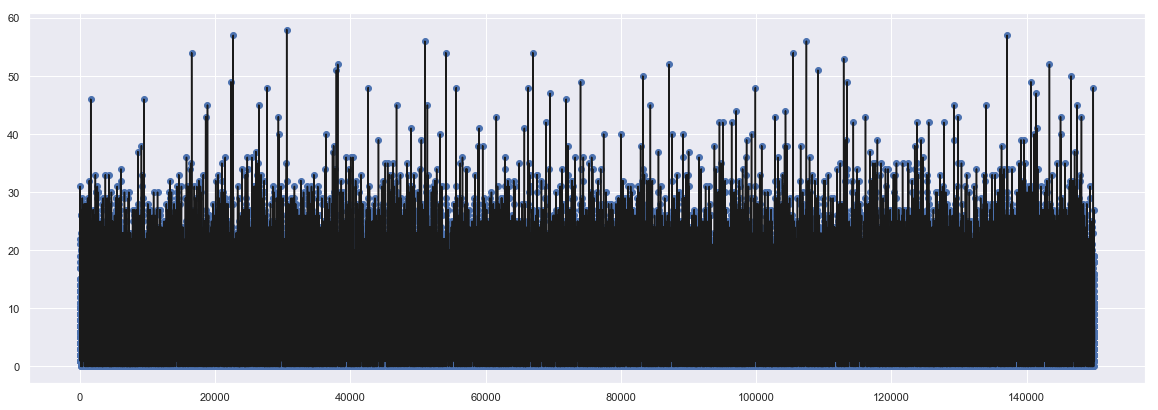

In [103]:
#plt.plot(data2.RevolvingUtilizationOfUnsecuredLines)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.numberofopencreditlinesandloans, 'bo',df_data.numberofopencreditlinesandloans, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.numberofopencreditlinesandloans),np.mean(df_data.numberofopencreditlinesandloans)))
ruoelLt2=len(df_data[df_data.numberofopencreditlinesandloans < 2])
ruoelACt=len(df_data.numberofopencreditlinesandloans)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(data2.RevolvingUtilizationOfUnsecuredLines, shade=True, color="r")
#df_data.age.plot.box()
#df_data.RevolvingUtilizationOfUnsecuredLines.plot.box()

NumberOfTime30-59DaysPastDueNotWorse Varience

Median: 0.0000000 
Mean: 0.2453533
Values less than 2 : 142320 in 150000. Ratio: 94.88000%


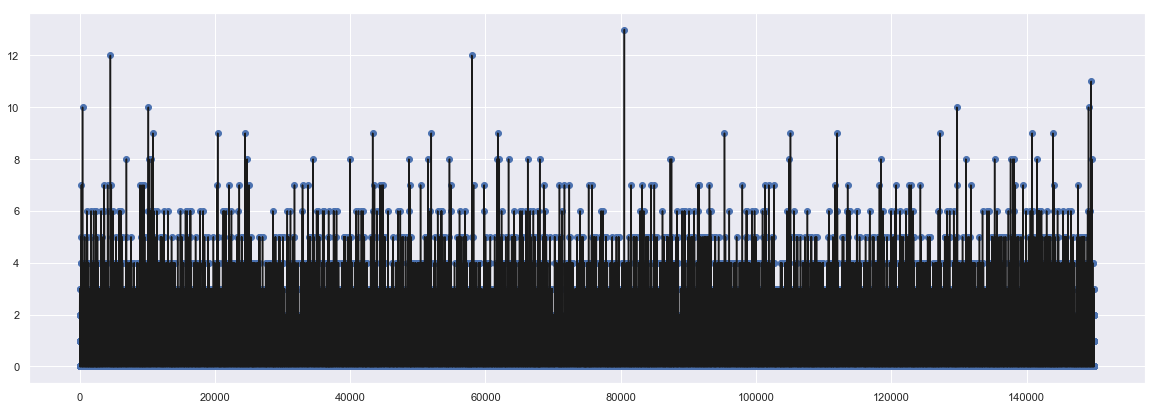

In [104]:
#plt.plot(data2.RevolvingUtilizationOfUnsecuredLines)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.numberoftime3059dayspastduenotworse, 'bo',df_data.numberoftime3059dayspastduenotworse, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.numberoftime3059dayspastduenotworse),np.mean(df_data.numberoftime3059dayspastduenotworse)))
ruoelLt2=len(df_data[df_data.numberoftime3059dayspastduenotworse < 2])
ruoelACt=len(df_data.numberoftime3059dayspastduenotworse)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(data2.RevolvingUtilizationOfUnsecuredLines, shade=True, color="r")
#df_data.age.plot.box()
#df_data.RevolvingUtilizationOfUnsecuredLines.plot.box()

In [105]:
### Set outlier values to median , that is 0.
ind = np.where(df_data.numberoftime3059dayspastduenotworse>95)
df_data.numberoftime3059dayspastduenotworse[ind[0]] = 0.

NumberOfTimes90DaysLate Variance

Median: 0.0000000 
Mean: 0.0902933
Values less than 2 : 147174 in 150000. Ratio: 98.11600%


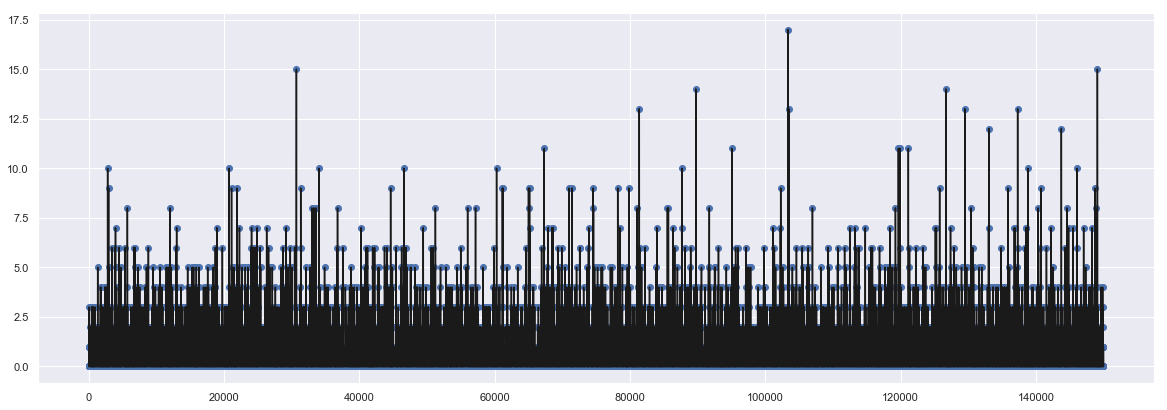

In [106]:
#plt.plot(data2.RevolvingUtilizationOfUnsecuredLines)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.numberoftimes90dayslate, 'bo',df_data.numberoftimes90dayslate, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.numberoftimes90dayslate),np.mean(df_data.numberoftimes90dayslate)))
ruoelLt2=len(df_data[df_data.numberoftimes90dayslate < 2])
ruoelACt=len(df_data.numberoftimes90dayslate)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(data2.RevolvingUtilizationOfUnsecuredLines, shade=True, color="r")
#df_data.age.plot.box()
#df_data.RevolvingUtilizationOfUnsecuredLines.plot.box()

In [107]:
### Set outlier values to median , that is 0.
ind = np.where(df_data.numberoftimes90dayslate>95)
df_data.numberoftimes90dayslate[ind[0]] = 0

NumberRealEstateLoansOrLines Variance

Median: 1.0000000 
Mean: 1.0172733
Values less than 2 : 108526 in 150000. Ratio: 72.35067%


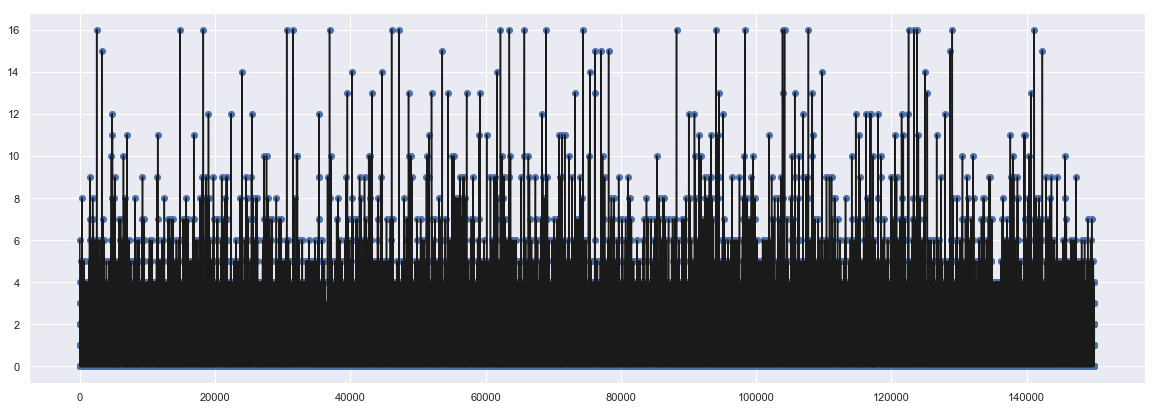

In [108]:
#plt.plot(data2.RevolvingUtilizationOfUnsecuredLines)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.numberrealestateloansorlines, 'bo',df_data.numberrealestateloansorlines, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.numberrealestateloansorlines),np.mean(df_data.numberrealestateloansorlines)))
ruoelLt2=len(df_data[df_data.numberrealestateloansorlines < 2])
ruoelACt=len(df_data.numberrealestateloansorlines)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(data2.RevolvingUtilizationOfUnsecuredLines, shade=True, color="r")
#df_data.age.plot.box()
#df_data.RevolvingUtilizationOfUnsecuredLines.plot.box()

In [110]:
Counter(df_data.numberrealestateloansorlines)
### Set outlier values to 16.
ind = np.where(df_data.numberrealestateloansorlines>16)
df_data.numberrealestateloansorlines[ind[0]] = 16

NumberOfTime60-89DaysPastDueNotWorse Variance

Median: 0.0000000 
Mean: 0.0647067
Values less than 2 : 148396 in 150000. Ratio: 98.93067%


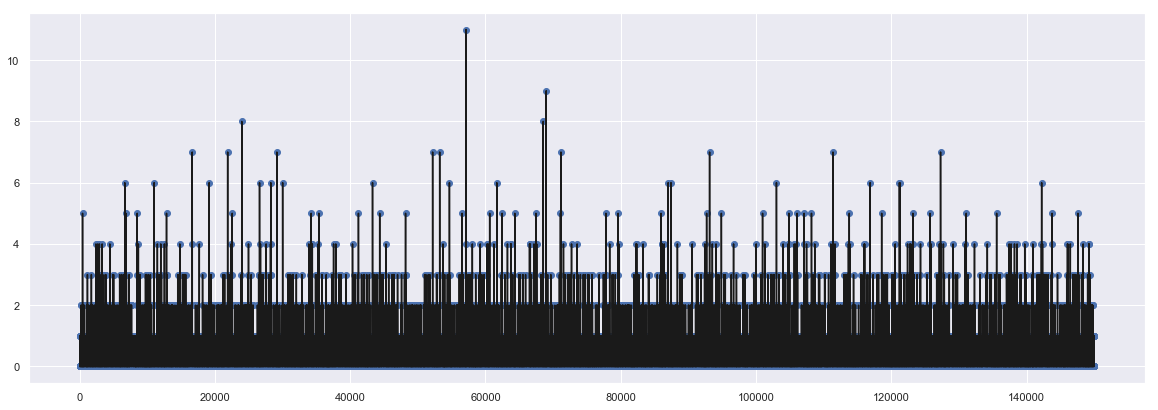

In [111]:
#plt.plot(data2.RevolvingUtilizationOfUnsecuredLines)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.numberoftime6089dayspastduenotworse, 'bo',df_data.numberoftime6089dayspastduenotworse, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.numberoftime6089dayspastduenotworse),np.mean(df_data.numberoftime6089dayspastduenotworse)))
ruoelLt2=len(df_data[df_data.numberoftime6089dayspastduenotworse < 2])
ruoelACt=len(df_data.numberoftime6089dayspastduenotworse)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(data2.RevolvingUtilizationOfUnsecuredLines, shade=True, color="r")
#df_data.age.plot.box()
#df_data.RevolvingUtilizationOfUnsecuredLines.plot.box()

In [112]:
Counter(df_data.numberoftime6089dayspastduenotworse)
### Set outlier values to 0.
ind = np.where(df_data.numberoftime6089dayspastduenotworse>11)
df_data.numberoftime6089dayspastduenotworse[ind[0]] = 0

NumberOfDependents Variance

Median: 0.0000000 
Mean: 0.7374133
Values less than 2 : 117142 in 150000. Ratio: 78.09467%


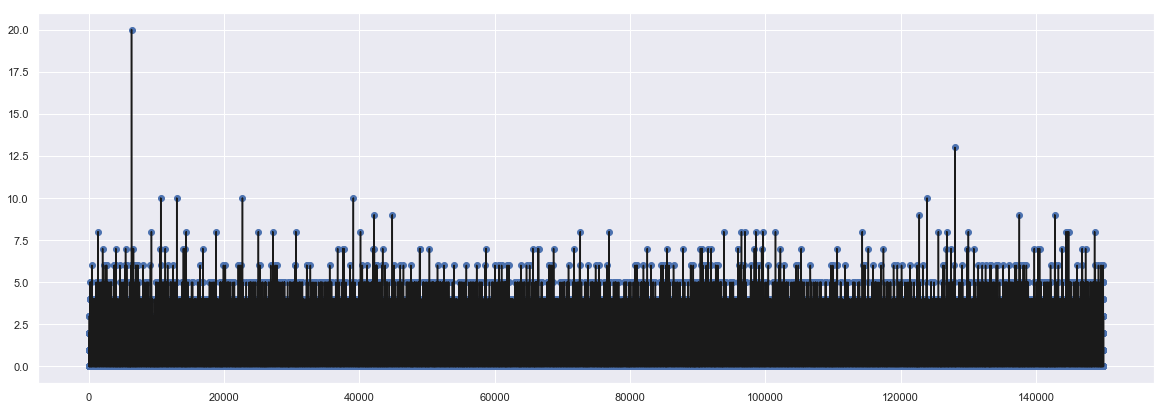

In [113]:
#plt.plot(data2.RevolvingUtilizationOfUnsecuredLines)
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.numberofdependents, 'bo',df_data.numberofdependents, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.numberofdependents),np.mean(df_data.numberofdependents)))
ruoelLt2=len(df_data[df_data.numberofdependents < 2])
ruoelACt=len(df_data.numberofdependents)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))
#sns.kdeplot(data2.RevolvingUtilizationOfUnsecuredLines, shade=True, color="r")
#df_data.age.plot.box()
#df_data.RevolvingUtilizationOfUnsecuredLines.plot.box()

In [114]:
Counter(df_data.numberofdependents)
ind = np.where(df_data.numberofdependents >10)
df_data.numberofdependents[ind[0]] = 10

Train and build baseline model

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [116]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

K NEAREST NEIGHBOUR

In [118]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [119]:
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [120]:
knMod.score(X_test, y_test)

0.9321066666666666

LOGISTIC REGRESSION

In [121]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [122]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

In [123]:
glmMod.score(X_test, y_test)

0.93352

ADABOOST CLASSIFIER

In [124]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [125]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [126]:
adaMod.score(X_test, y_test)

0.9359733333333333

GRADIENT BOOSTING CLASSIFIER

In [127]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [128]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [129]:
gbMod.score(X_test, y_test)

0.9368

RANDOM FOREST 

In [130]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [131]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
rfMod.score(X_test, y_test)

0.9337866666666667

CROSS VALIDATION

In [134]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [135]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.0s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.3s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.5s finished


{'KNeighborsClassifier': [0.5722436529317598, 0.0009972953228840915],
 'LogisticRegression': [0.7001078312264162, 0.004303682375574517],
 'AdaBoostClassifier': [0.8597288862348046, 0.002487212561355637],
 'GradientBoostingClassifier': [0.8650220633396792, 0.0030910700380403747],
 'RandomForestClassifier': [0.7812030256442136, 0.004546161877680288]}